In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:

import chardet

with open('SuperStore_Orders.csv', 'rb') as f:
    result = chardet.detect(f.read())
    print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [7]:
pip install chardet 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
df = pd.read_csv('SuperStore_Orders.csv', encoding='Windows-1252')

In [11]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [66]:
df.duplicated().sum()

np.int64(0)

In [17]:
print(df.head()) 

          order_id  order_date   ship_date       ship_mode    customer_name  \
0     AG-2011-2040  01-01-2011  06-01-2011  Standard Class  Toby Braunhardt   
1    IN-2011-47883  01-01-2011  08-01-2011  Standard Class      Joseph Holt   
2     HU-2011-1220  01-01-2011  05-01-2011    Second Class    Annie Thurman   
3  IT-2011-3647632  01-01-2011  05-01-2011    Second Class     Eugene Moren   
4    IN-2011-47883  01-01-2011  08-01-2011  Standard Class      Joseph Holt   

       segment            state    country  market   region  ...  \
0     Consumer      Constantine    Algeria  Africa   Africa  ...   
1     Consumer  New South Wales  Australia    APAC  Oceania  ...   
2     Consumer         Budapest    Hungary    EMEA     EMEA  ...   
3  Home Office        Stockholm     Sweden      EU    North  ...   
4     Consumer  New South Wales  Australia    APAC  Oceania  ...   

          category sub_category                 product_name sales quantity  \
0  Office Supplies      Storage      

In [18]:
sales_per_year = df.groupby('year')[['sales', 'quantity', 'profit']].sum().reset_index()

print(sales_per_year)

   year                                              sales  quantity  \
0  2011  4081206645114553142769126673382118541931591951...     31443   
1  2012  2,8221,2304174131,1886279162744521782452651032...     38111   
2  2013  1,6491,3587292,1901,36229924615524241785951151...     48136   
3  2014  6778463321571603021072031529954354138138404319...     60622   

         profit  
0  248940.81154  
1  307415.27910  
2  408512.76018  
3  504165.97046  


#### Analisa Penjualan per Tahun

In [29]:
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')
df['profit'] = pd.to_numeric(df['profit'], errors='coerce')
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')


In [30]:
print(df.dtypes)

order_id           object
order_date         object
ship_date          object
ship_mode          object
customer_name      object
segment            object
state              object
country            object
market             object
region             object
product_id         object
category           object
sub_category       object
product_name       object
sales             float64
quantity            int64
discount          float64
profit            float64
shipping_cost     float64
order_priority     object
year                int64
dtype: object


In [46]:
sales_per_year = df.groupby('year')[['sales', 'quantity', 'profit']].sum().reset_index()
print (sales_per_year)

   year      sales  quantity        profit
0  2011  1378151.0     31443  248940.81154
1  2012  1681499.0     38111  307415.27910
2  2013  2107021.0     48136  408512.76018
3  2014  2668457.0     60622  504165.97046


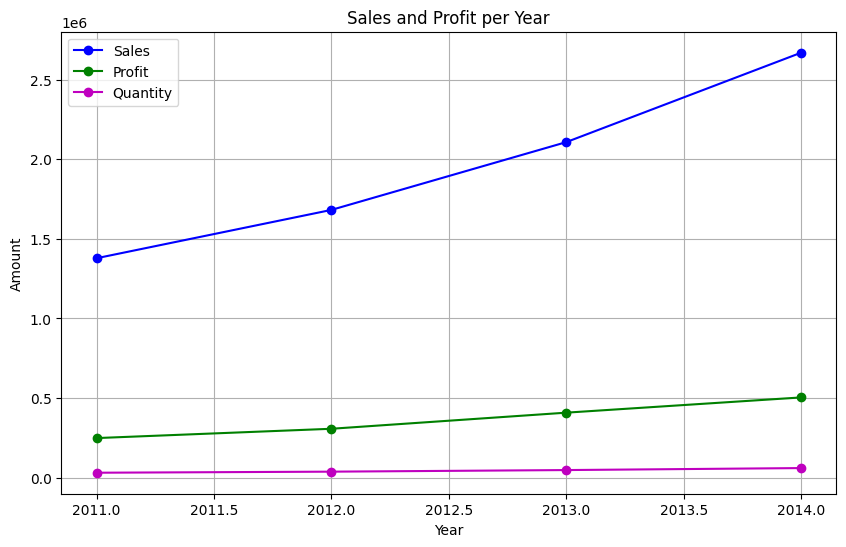

In [68]:
plt.figure(figsize=(10,6))
plt.plot(sales_per_year['year'], sales_per_year['sales'], marker='o', label='Sales', color='b')
plt.plot(sales_per_year['year'], sales_per_year['profit'], marker='o', label='Profit', color='g')
plt.plot(sales_per_year['year'], sales_per_year['quantity'], marker='o', label='Quantity', color='m')
plt.title('Sales and Profit per Year')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()


#### Penjualan berdasarkan Kategori

In [83]:
print(df['category'].unique())

['Office Supplies' 'Furniture' 'Technology']


In [84]:
print(df['sub_category'].unique())

['Storage' 'Supplies' 'Paper' 'Furnishings' 'Machines' 'Appliances'
 'Copiers' 'Chairs' 'Tables' 'Bookcases' 'Phones' 'Accessories' 'Labels'
 'Art' 'Envelopes' 'Fasteners' 'Binders']


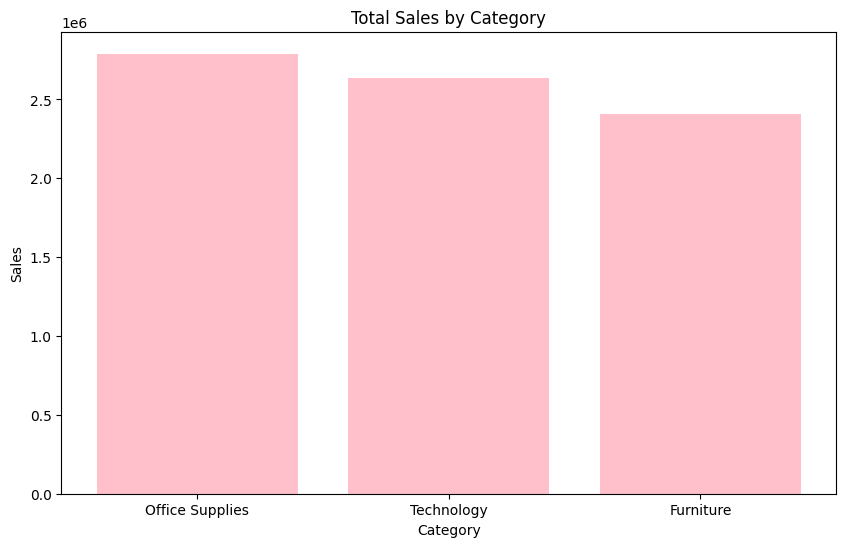

In [87]:
sales_by_category = df.groupby('category')['sales'].sum().reset_index().sort_values('sales', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(sales_by_category['category'], sales_by_category['sales'], color='pink')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

Kategori dengan sales tertinggi: Office Supplies


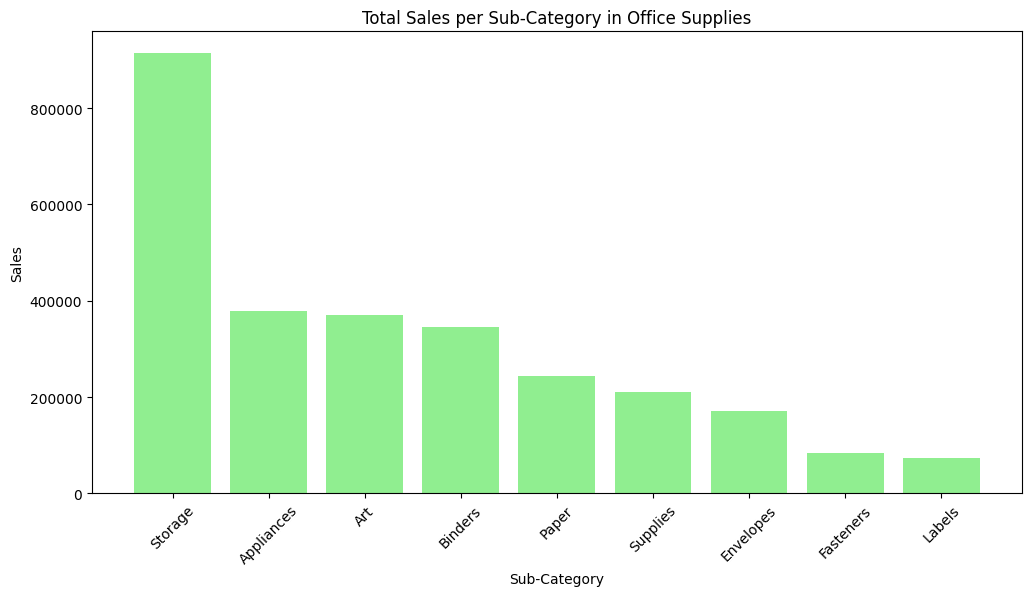

In [93]:
top_category = sales_by_category.iloc[0]['category']
print(f"Kategori dengan sales tertinggi: {top_category}")

sub_category_sales = df[df['category'] == top_category].groupby('sub_category')['sales'].sum().reset_index().sort_values('sales', ascending=False)

plt.figure(figsize=(12,6))
plt.bar(sub_category_sales['sub_category'], sub_category_sales['sales'], color='lightgreen')
plt.title(f'Total Sales per Sub-Category in {top_category}')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

#### Kategori dengan Total Barang Terjual Terbanyak

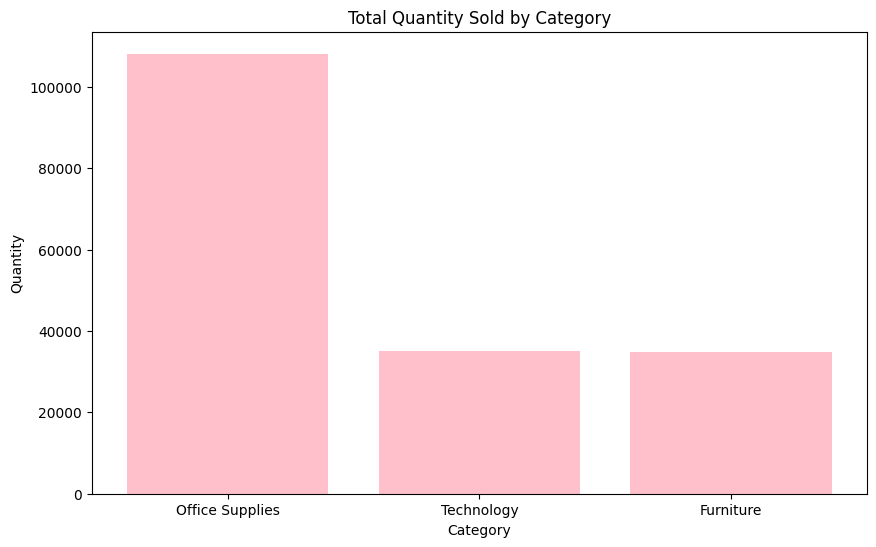

In [70]:
quantity_by_category = df.groupby('category')['quantity'].sum().reset_index().sort_values('quantity', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(quantity_by_category['category'], quantity_by_category['quantity'], color='pink')
plt.title('Total Quantity Sold by Category')
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.show()

Kategori dengan produk terjual tertinggi: Office Supplies


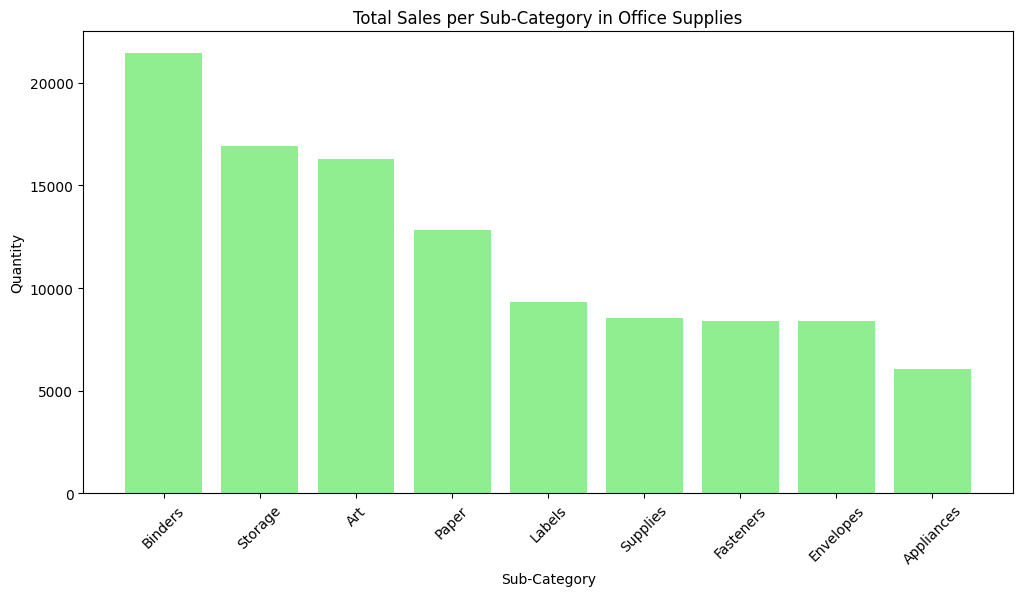

In [95]:
top_category_quantity = quantity_by_category.iloc[0]['category']
print(f"Kategori dengan produk terjual tertinggi: {top_category_quantity}")

sub_category_quantity = df[df['category'] == top_category_quantity].groupby('sub_category')['quantity'].sum().reset_index().sort_values('quantity', ascending=False)

plt.figure(figsize=(12,6))
plt.bar(sub_category_quantity['sub_category'], sub_category_quantity['quantity'], color='lightgreen')
plt.title(f'Total Sales per Sub-Category in {top_category}')
plt.xlabel('Sub-Category')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()

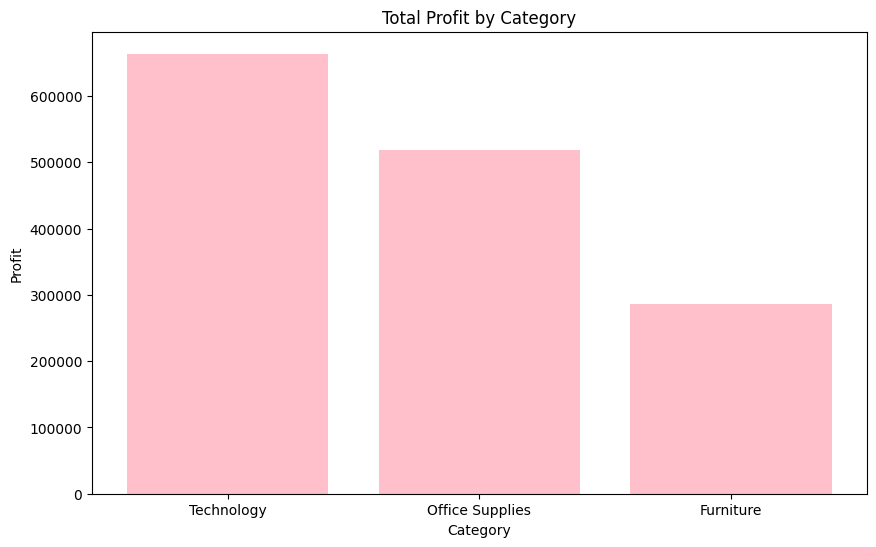

In [71]:
profit_by_category = df.groupby('category')['profit'].sum().reset_index().sort_values('profit', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(profit_by_category['category'], profit_by_category['profit'], color='pink')
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show()

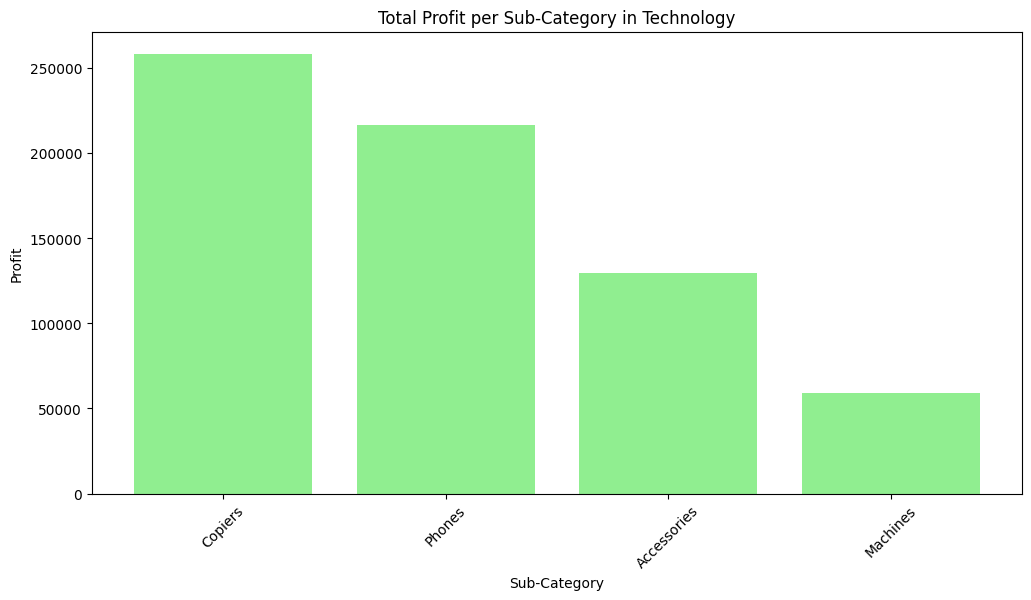

In [97]:
technology_data = df[df['category'] == 'Technology']
profit_by_sub_category = technology_data.groupby('sub_category')['profit'].sum().reset_index().sort_values('profit', ascending=False)


plt.figure(figsize=(12,6))
plt.bar(profit_by_sub_category['sub_category'], profit_by_sub_category['profit'], color='lightgreen')
plt.title('Total Profit per Sub-Category in Technology')
plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()

#### Segmentasi Customer

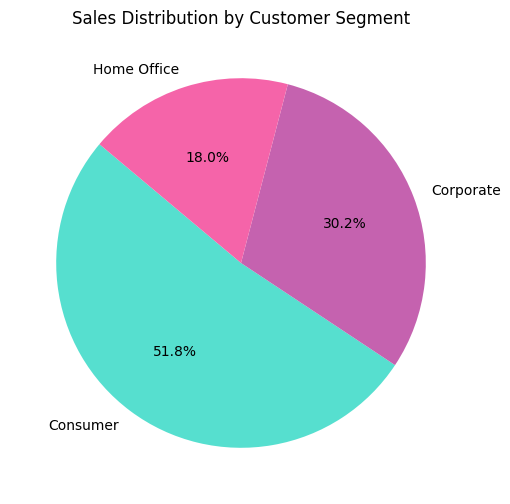

In [76]:
segment_sales = df.groupby('segment')['sales'].sum().reset_index()

plt.figure(figsize=(6,6))
colors = ['#56DFCF', '#C562AF', '#F564A9']
plt.pie(segment_sales['sales'], labels=segment_sales['segment'], colors = colors, autopct='%1.1f%%',startangle=140)
plt.title('Sales Distribution by Customer Segment')
plt.show()

#### Analisis Shipping Mode

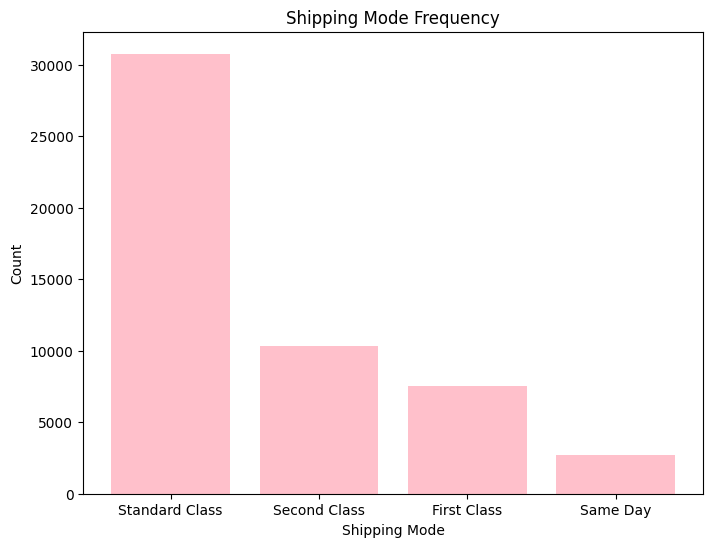

In [64]:
shipping_mode_count = df['ship_mode'].value_counts().reset_index()
shipping_mode_count.columns = ['ship_mode', 'count'] 

plt.figure(figsize=(8,6))
plt.bar(shipping_mode_count['ship_mode'], shipping_mode_count['count'], color='pink')
plt.title('Shipping Mode Frequency')
plt.xlabel('Shipping Mode')
plt.ylabel('Count')
plt.show()


#### Analisis Waktu Pengiriman

In [60]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y')
df['ship_date'] = pd.to_datetime(df['ship_date'], format='%d-%m-%Y')
df['delivery_days'] = (df['ship_date'] - df['order_date']).dt.days.astype(int)

delivery_avg = df.groupby('ship_mode')['delivery_days'].mean().round(0).astype(int).reset_index()

print(delivery_avg)

        ship_mode  delivery_days
0     First Class              2
1        Same Day              0
2    Second Class              3
3  Standard Class              5


#### Produk Rugi

In [91]:
loss_products = df[df['profit'] < 0][['product_name', 'sales', 'profit']].sort_values('profit')

print(loss_products.head())

                                    product_name  sales     profit
31884  Cubify CubeX 3D Printer Double Head Print    NaN -6599.9780
29212             Motorola Smart Phone, Cordless    NaN -4088.3760
47195  Cubify CubeX 3D Printer Triple Head Print    NaN -3839.9904
3775   GBC DocuBind P400 Electric Binding System    NaN -3701.8928
37130  Lexmark MX611dhe Monochrome Laser Printer    NaN -3399.9800


In [102]:
# Ambil produk yang rugi
loss_products = df[df['profit'] < 0][['product_name', 'sales', 'profit', 'discount', 'shipping_cost']]

# Ubah diskon jadi persen
loss_products['discount_percent'] = loss_products['discount'] * 100

# Tampilkan 10 produk dengan kerugian tertinggi
print(loss_products.sort_values('profit').head(10))

                                    product_name  sales     profit  discount  \
31884  Cubify CubeX 3D Printer Double Head Print    NaN -6599.9780       0.7   
29212             Motorola Smart Phone, Cordless    NaN -4088.3760       0.6   
47195  Cubify CubeX 3D Printer Triple Head Print    NaN -3839.9904       0.5   
3775   GBC DocuBind P400 Electric Binding System    NaN -3701.8928       0.8   
37130  Lexmark MX611dhe Monochrome Laser Printer    NaN -3399.9800       0.7   
24286                        Hoover Stove, White    NaN -3059.8200       0.5   
28510               Apple Smart Phone, Full Size    NaN -3009.4350       0.5   
49628       Ibico EPK-21 Electric Binding System    NaN -2929.4845       0.8   
34513     Barricks Conference Table, Rectangular    NaN -2750.2800       0.7   
19251  Cubify CubeX 3D Printer Double Head Print    NaN -2639.9912       0.7   

       shipping_cost  discount_percent  
31884         451.63              70.0  
29212          51.89              60.